In [ ]:
"""
File presents operations performed in order to preprocess data to use in NTCSSFL.
Dataset downloaded from: https://www.kaggle.com/jsrojas/ip-network-traffic-flows-labeled-with-87-apps
"""

'\nFile presents operations performed in order to preprocess data to use in NTCSSFL.\nDataset downloaded from: https://www.kaggle.com/jsrojas/ip-network-traffic-flows-labeled-with-87-apps\n'

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jsrojas/ip-network-traffic-flows-labeled-with-87-apps")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/ip-network-traffic-flows-labeled-with-87-apps


In [ ]:
import os

dataset_path = "/kaggle/input/ip-network-traffic-flows-labeled-with-87-apps"
files = os.listdir(dataset_path)

print("Files in dataset directory:")
for file in files:
    print(file)


Files in dataset directory:
Dataset-Unicauca-Version2-87Atts.csv


In [ ]:

!pip install imblearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 6.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
import socket, struct

import imblearn
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import NearMiss

In [ ]:
filepath = "/kaggle/input/ip-network-traffic-flows-labeled-with-87-apps/Dataset-Unicauca-Version2-87Atts.csv"
data = pd.read_csv(filepath , parse_dates=True)
data.head()

,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,...,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label,L7Protocol,ProtocolName
0,172.19.1.46-10.200.7.7-52422-3128-6,172.19.1.46,52422,10.200.7.7,3128,6,26/04/201711:11:17,45523,22,55,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
1,172.19.1.46-10.200.7.7-52422-3128-6,10.200.7.7,3128,172.19.1.46,52422,6,26/04/201711:11:17,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
2,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,1,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
3,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,217,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
4,192.168.72.43-10.200.7.7-55961-3128-6,192.168.72.43,55961,10.200.7.7,3128,6,26/04/201711:11:17,78068,5,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY


In [ ]:
data.shape


(3577296, 87)

In [ ]:
data.columns

Index(['Flow.ID', 'Source.IP', 'Source.Port', 'Destination.IP',
       'Destination.Port', 'Protocol', 'Timestamp', 'Flow.Duration',
       'Total.Fwd.Packets', 'Total.Backward.Packets',
       'Total.Length.of.Fwd.Packets', 'Total.Length.of.Bwd.Packets',
       'Fwd.Packet.Length.Max', 'Fwd.Packet.Length.Min',
       'Fwd.Packet.Length.Mean', 'Fwd.Packet.Length.Std',
       'Bwd.Packet.Length.Max', 'Bwd.Packet.Length.Min',
       'Bwd.Packet.Length.Mean', 'Bwd.Packet.Length.Std', 'Flow.Bytes.s',
       'Flow.Packets.s', 'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max',
       'Flow.IAT.Min', 'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std',
       'Fwd.IAT.Max', 'Fwd.IAT.Min', 'Bwd.IAT.Total', 'Bwd.IAT.Mean',
       'Bwd.IAT.Std', 'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.PSH.Flags',
       'Bwd.PSH.Flags', 'Fwd.URG.Flags', 'Bwd.URG.Flags', 'Fwd.Header.Length',
       'Bwd.Header.Length', 'Fwd.Packets.s', 'Bwd.Packets.s',
       'Min.Packet.Length', 'Max.Packet.Length', 'Packet.Length.Mean',
  

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3577296 entries, 0 to 3577295
Data columns (total 87 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Flow.ID                      object 
 1   Source.IP                    object 
 2   Source.Port                  int64  
 3   Destination.IP               object 
 4   Destination.Port             int64  
 5   Protocol                     int64  
 6   Timestamp                    object 
 7   Flow.Duration                int64  
 8   Total.Fwd.Packets            int64  
 9   Total.Backward.Packets       int64  
 10  Total.Length.of.Fwd.Packets  int64  
 11  Total.Length.of.Bwd.Packets  float64
 12  Fwd.Packet.Length.Max        int64  
 13  Fwd.Packet.Length.Min        int64  
 14  Fwd.Packet.Length.Mean       float64
 15  Fwd.Packet.Length.Std        float64
 16  Bwd.Packet.Length.Max        int64  
 17  Bwd.Packet.Length.Min        int64  
 18  Bwd.Packet.Length.Mean       float64
 19  

In [ ]:
non_num_cols = [col for col in data.columns if data[col].dtype == 'O']
non_num_data = data[non_num_cols]
non_num_data

,Flow.ID,Source.IP,Destination.IP,Timestamp,Label,ProtocolName
0,172.19.1.46-10.200.7.7-52422-3128-6,172.19.1.46,10.200.7.7,26/04/201711:11:17,BENIGN,HTTP_PROXY
1,172.19.1.46-10.200.7.7-52422-3128-6,10.200.7.7,172.19.1.46,26/04/201711:11:17,BENIGN,HTTP_PROXY
2,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,10.200.7.217,26/04/201711:11:17,BENIGN,HTTP
3,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,10.200.7.217,26/04/201711:11:17,BENIGN,HTTP
4,192.168.72.43-10.200.7.7-55961-3128-6,192.168.72.43,10.200.7.7,26/04/201711:11:17,BENIGN,HTTP_PROXY
...,...,...,...,...,...,...
3577291,10.200.7.199-98.138.79.73-42135-443-6,98.138.79.73,10.200.7.199,15/05/201705:43:40,BENIGN,SSL
3577292,10.200.7.217-98.138.79.73-51546-443-6,98.138.79.73,10.200.7.217,15/05/201705:46:10,BENIGN,SSL
3577293,10.200.7.218-98.138.79.73-44366-443-6,98.138.79.73,10.200.7.218,15/05/201705:45:39,BENIGN,SSL
3577294,10.200.7.195-98.138.79.73-52341-443-6,98.138.79.73,10.200.7.195,15/05/201705:45:59,BENIGN,SSL


In [ ]:
[(col, non_num_data[col].nunique()) for col in non_num_cols]

[('Flow.ID', 1522917),
 ('Source.IP', 6566),
 ('Destination.IP', 22824),
 ('Timestamp', 41915),
 ('Label', 1),
 ('ProtocolName', 78)]

In [ ]:
def summarize_cat(col_name):
    sorted_values = sorted(non_num_data[col_name].value_counts().items(), key=lambda x: x[1], reverse=True)
    remaining_per = 100
    for (value, count) in sorted_values:
        per = count / len(non_num_data) * 100
        if per >= 1:
            print(f'{value} : {per:.2f}%')
        else:
            print(f'Others : {remaining_per:.2f}%')
            break
        remaining_per -= per


In [ ]:
for col in non_num_cols:
    print(f"Summary of {col} column : ")
    summarize_cat(col)
    print('\n')

Summary of Flow.ID column : 
Others : 100.00%


Summary of Source.IP column : 
10.200.7.218 : 8.26%
10.200.7.217 : 7.49%
10.200.7.199 : 6.28%
10.200.7.195 : 5.34%
10.200.7.194 : 5.08%
10.200.7.196 : 4.93%
10.200.7.9 : 3.47%
10.200.7.6 : 3.00%
10.200.7.5 : 2.85%
10.200.7.4 : 2.84%
10.200.7.8 : 2.58%
10.200.7.7 : 2.51%
Others : 45.37%


Summary of Destination.IP column : 
10.200.7.8 : 9.03%
10.200.7.7 : 8.81%
10.200.7.9 : 6.25%
10.200.7.5 : 5.46%
10.200.7.6 : 5.34%
10.200.7.4 : 5.16%
10.200.7.218 : 1.08%
10.200.7.217 : 1.05%
Others : 57.83%


Summary of Timestamp column : 
Others : 100.00%


Summary of Label column : 
BENIGN : 100.00%


Summary of ProtocolName column : 
GOOGLE : 26.81%
HTTP : 19.11%
HTTP_PROXY : 17.42%
SSL : 11.32%
HTTP_CONNECT : 8.88%
YOUTUBE : 4.77%
AMAZON : 2.43%
MICROSOFT : 1.53%
GMAIL : 1.13%
Others : 6.60%




In [ ]:
num_cols = list(set(data.columns) - set(non_num_cols))
num_cols

['Fwd.Packet.Length.Max',
 'Active.Max',
 'Idle.Std',
 'Min.Packet.Length',
 'Subflow.Bwd.Packets',
 'Bwd.Avg.Packets.Bulk',
 'Total.Backward.Packets',
 'Idle.Max',
 'Active.Min',
 'URG.Flag.Count',
 'Subflow.Fwd.Packets',
 'Total.Fwd.Packets',
 'Fwd.Header.Length',
 'CWE.Flag.Count',
 'Down.Up.Ratio',
 'Bwd.IAT.Max',
 'Subflow.Bwd.Bytes',
 'Fwd.IAT.Min',
 'L7Protocol',
 'Fwd.Avg.Bytes.Bulk',
 'Flow.IAT.Std',
 'Idle.Mean',
 'PSH.Flag.Count',
 'act_data_pkt_fwd',
 'Fwd.Packets.s',
 'Bwd.IAT.Std',
 'Flow.IAT.Min',
 'Packet.Length.Variance',
 'SYN.Flag.Count',
 'Bwd.IAT.Total',
 'Init_Win_bytes_forward',
 'Fwd.Header.Length.1',
 'Bwd.Packet.Length.Mean',
 'ECE.Flag.Count',
 'Bwd.Avg.Bulk.Rate',
 'Packet.Length.Mean',
 'Fwd.Packet.Length.Mean',
 'ACK.Flag.Count',
 'Flow.Bytes.s',
 'Total.Length.of.Bwd.Packets',
 'Bwd.Packet.Length.Min',
 'Fwd.Packet.Length.Std',
 'Bwd.Header.Length',
 'Bwd.IAT.Mean',
 'Fwd.IAT.Total',
 'RST.Flag.Count',
 'Fwd.IAT.Max',
 'Average.Packet.Size',
 'Fwd.IAT.Mea

In [ ]:
data[num_cols].describe()

,Fwd.Packet.Length.Max,Active.Max,Idle.Std,Min.Packet.Length,Subflow.Bwd.Packets,Bwd.Avg.Packets.Bulk,Total.Backward.Packets,Idle.Max,Active.Min,URG.Flag.Count,...,Fwd.URG.Flags,Init_Win_bytes_backward,Max.Packet.Length,Flow.Duration,Protocol,Idle.Min,Flow.Packets.s,Avg.Fwd.Segment.Size,Bwd.IAT.Min,Active.Mean
count,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3577296.0,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,...,3577296.0,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06
mean,5.123645e+02,5.229372e+05,1.370991e+06,3.043745e+00,6.534083e+01,0.0,6.534083e+01,9.743845e+06,1.676336e+05,2.773847e-01,...,0.0,2.123489e+03,1.333250e+03,2.544247e+07,6.005508e+00,7.252097e+06,8.896338e+04,1.149212e+02,8.889991e+05,2.981990e+05
std,1.039319e+03,3.266508e+06,4.814474e+06,4.145472e+01,1.108092e+03,0.0,1.108092e+03,1.888557e+07,2.064219e+06,4.477080e-01,...,0.0,7.704789e+03,2.453395e+03,4.014430e+07,3.274574e-01,1.600754e+07,4.027620e+05,2.464707e+02,6.231082e+06,2.349390e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,-1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.666667e-02,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.0,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,1.800000e+01,6.000000e+00,6.280000e+02,6.000000e+00,0.000000e+00,1.128096e+00,6.000000e+00,0.000000e+00,0.000000e+00
50%,2.060000e+02,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,0.0,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,2.620000e+02,3.550000e+02,5.847295e+05,6.000000e+00,0.000000e+00,3.393752e+01,4.657143e+01,0.000000e+00,0.000000e+00
75%,6.130000e+02,5.700000e+01,0.000000e+00,6.000000e+00,1.500000e+01,0.0,1.500000e+01,8.034389e+06,2.000000e+00,1.000000e+00,...,0.0,6.600000e+02,1.460000e+03,4.500153e+07,6.000000e+00,5.369712e+06,4.214963e+03,1.225000e+02,1.000000e+00,4.500000e+01
max,3.283200e+04,1.146950e+08,7.738746e+07,7.063000e+03,5.421960e+05,0.0,5.421960e+05,1.200000e+08,1.146950e+08,1.000000e+00,...,0.0,6.553500e+04,3.764800e+04,1.200000e+08,1.700000e+01,1.200000e+08,6.000000e+06,1.606000e+04,1.199999e+08,1.146950e+08


In [ ]:
[col for col in num_cols if data[col].isnull().any()]

[]

In [ ]:
print("range and no. of unique values in numeric columns")
for col in num_cols:
    print(f'{col}\tRange : {max(data[col]) - min(data[col])}, No. of unique values : {data[col].nunique()}')

range and no. of unique values in numeric columns
Fwd.Packet.Length.Max	Range : 32832, No. of unique values : 7737
Active.Max	Range : 114695014.0, No. of unique values : 589454
Idle.Std	Range : 77387456.1182628, No. of unique values : 570416
Min.Packet.Length	Range : 7063, No. of unique values : 1096
Subflow.Bwd.Packets	Range : 542196, No. of unique values : 8905
Bwd.Avg.Packets.Bulk	Range : 0, No. of unique values : 1
Total.Backward.Packets	Range : 542196, No. of unique values : 8905
Idle.Max	Range : 119999998.0, No. of unique values : 702678
Active.Min	Range : 114695014.0, No. of unique values : 340623
URG.Flag.Count	Range : 1, No. of unique values : 2
Subflow.Fwd.Packets	Range : 453189, No. of unique values : 8530
Total.Fwd.Packets	Range : 453189, No. of unique values : 8530
Fwd.Header.Length	Range : 15439500, No. of unique values : 21914
CWE.Flag.Count	Range : 0, No. of unique values : 1
Down.Up.Ratio	Range : 293, No. of unique values : 48
Bwd.IAT.Max	Range : 119999927.0, No. of un

In [ ]:
cols_for_hist = [col for col in num_cols if data[col].nunique() <= 50]
cols_for_hist, len(cols_for_hist)

(['Bwd.Avg.Packets.Bulk',
  'URG.Flag.Count',
  'CWE.Flag.Count',
  'Down.Up.Ratio',
  'Fwd.Avg.Bytes.Bulk',
  'PSH.Flag.Count',
  'SYN.Flag.Count',
  'ECE.Flag.Count',
  'Bwd.Avg.Bulk.Rate',
  'ACK.Flag.Count',
  'RST.Flag.Count',
  'Bwd.URG.Flags',
  'FIN.Flag.Count',
  'Fwd.Avg.Bulk.Rate',
  'Fwd.PSH.Flags',
  'min_seg_size_forward',
  'Fwd.Avg.Packets.Bulk',
  'Bwd.PSH.Flags',
  'Bwd.Avg.Bytes.Bulk',
  'Fwd.URG.Flags',
  'Protocol'],
 21)

In [ ]:
cols_for_desc = [col for col in num_cols if data[col].nunique() > 50]
cols_for_desc

['Fwd.Packet.Length.Max',
 'Active.Max',
 'Idle.Std',
 'Min.Packet.Length',
 'Subflow.Bwd.Packets',
 'Total.Backward.Packets',
 'Idle.Max',
 'Active.Min',
 'Subflow.Fwd.Packets',
 'Total.Fwd.Packets',
 'Fwd.Header.Length',
 'Bwd.IAT.Max',
 'Subflow.Bwd.Bytes',
 'Fwd.IAT.Min',
 'L7Protocol',
 'Flow.IAT.Std',
 'Idle.Mean',
 'act_data_pkt_fwd',
 'Fwd.Packets.s',
 'Bwd.IAT.Std',
 'Flow.IAT.Min',
 'Packet.Length.Variance',
 'Bwd.IAT.Total',
 'Init_Win_bytes_forward',
 'Fwd.Header.Length.1',
 'Bwd.Packet.Length.Mean',
 'Packet.Length.Mean',
 'Fwd.Packet.Length.Mean',
 'Flow.Bytes.s',
 'Total.Length.of.Bwd.Packets',
 'Bwd.Packet.Length.Min',
 'Fwd.Packet.Length.Std',
 'Bwd.Header.Length',
 'Bwd.IAT.Mean',
 'Fwd.IAT.Total',
 'Fwd.IAT.Max',
 'Average.Packet.Size',
 'Fwd.IAT.Mean',
 'Active.Std',
 'Subflow.Fwd.Bytes',
 'Total.Length.of.Fwd.Packets',
 'Bwd.Packet.Length.Std',
 'Flow.IAT.Mean',
 'Packet.Length.Std',
 'Flow.IAT.Max',
 'Fwd.Packet.Length.Min',
 'Fwd.IAT.Std',
 'Destination.Port',
 '

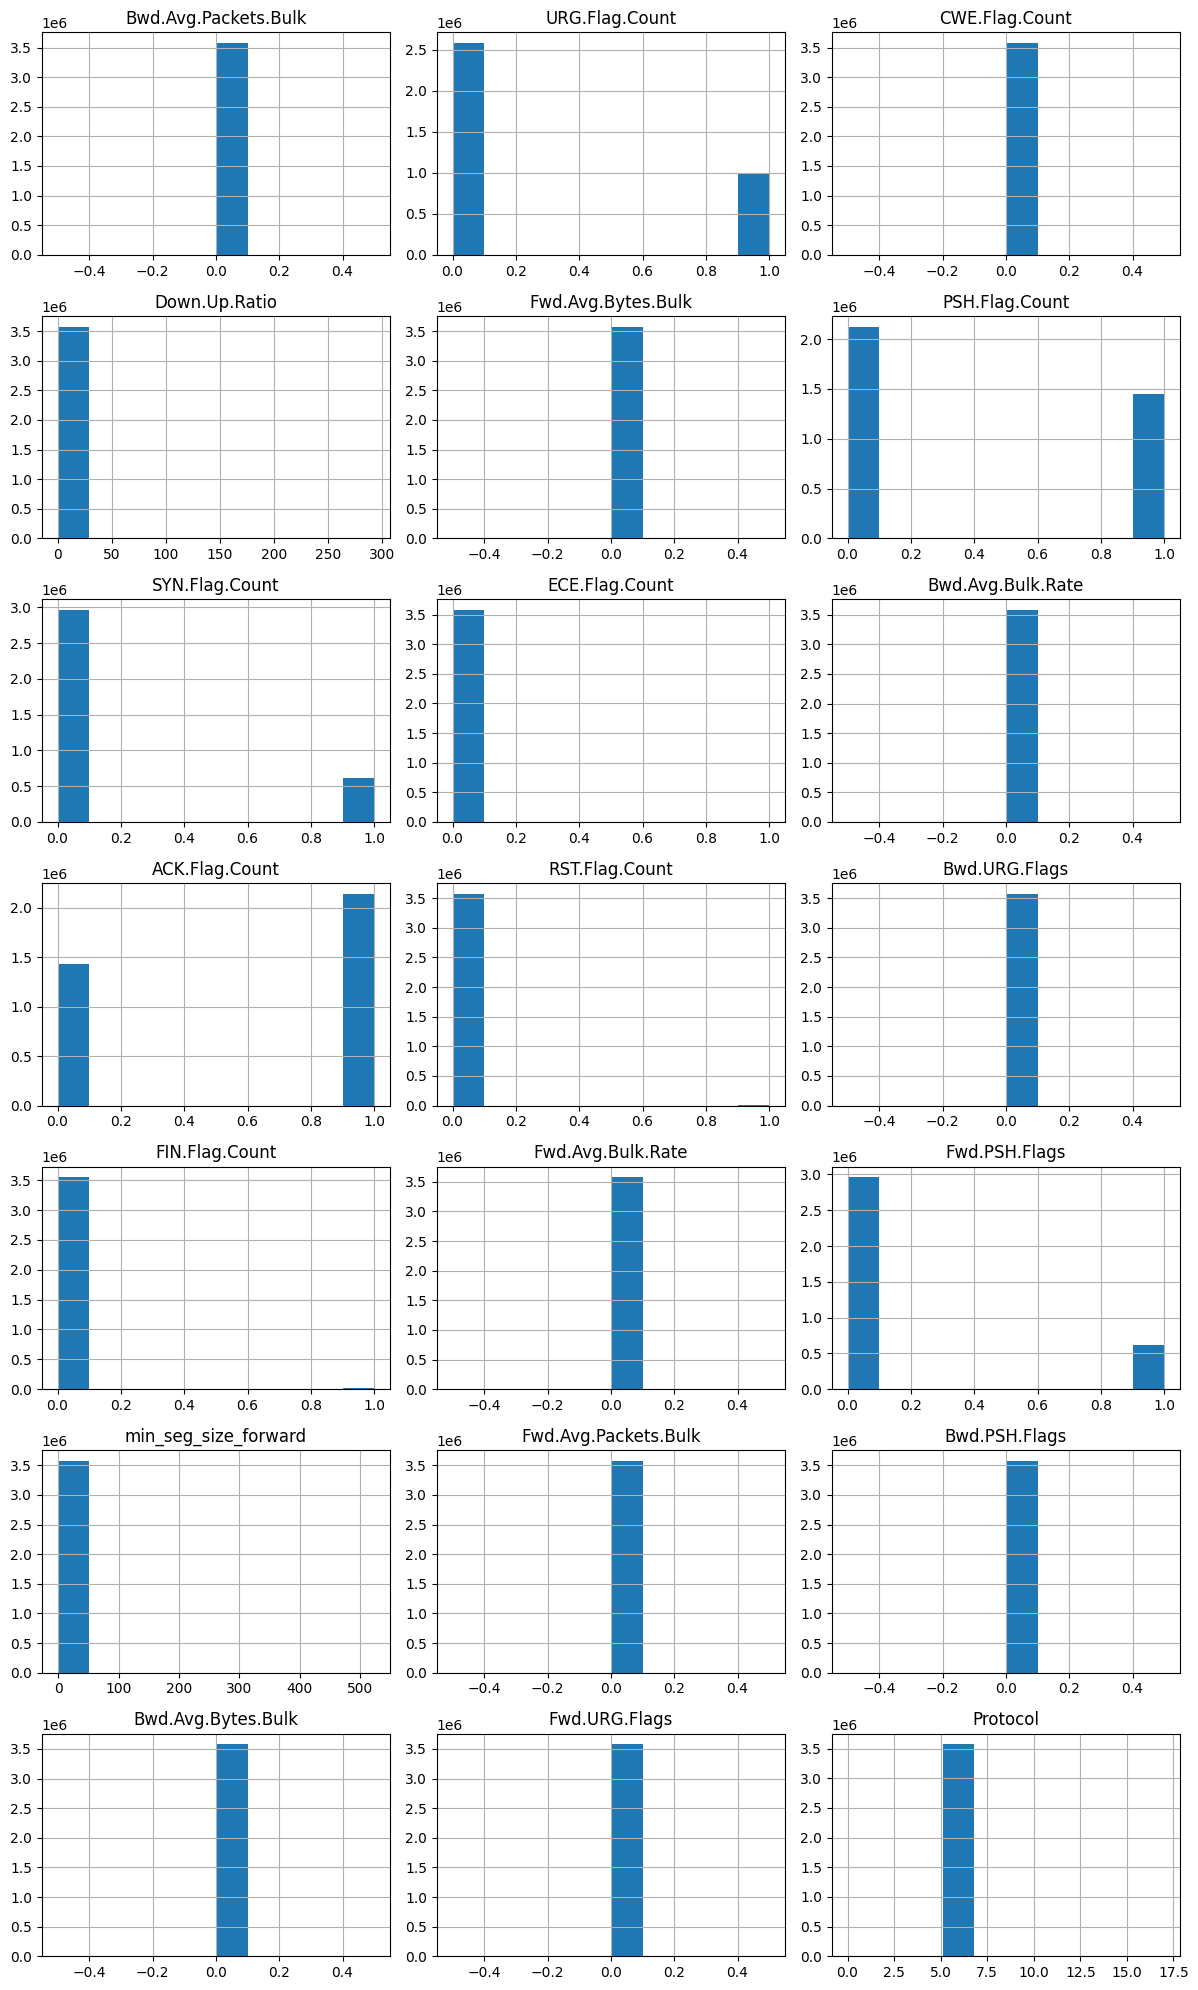

In [ ]:
data[cols_for_hist].hist(layout = (7,3), figsize = (12, 20))
plt.tight_layout()

In [ ]:
ipdata = data.copy()

In [ ]:
print("No. of unique values in Timestamp column :",ipdata['Timestamp'].nunique())
print("No. of unique values in FlowID column :",ipdata['Flow.ID'].nunique())

No. of unique values in Timestamp column : 41915
No. of unique values in FlowID column : 1522917


In [ ]:
ipdata.drop(['Timestamp', 'Flow.ID'], axis = 1, inplace = True)

In [ ]:
single_unique_cols = [col for col in ipdata.columns if ipdata[col].nunique() == 1]
single_unique_cols

['Bwd.PSH.Flags',
 'Fwd.URG.Flags',
 'Bwd.URG.Flags',
 'CWE.Flag.Count',
 'Fwd.Avg.Bytes.Bulk',
 'Fwd.Avg.Packets.Bulk',
 'Fwd.Avg.Bulk.Rate',
 'Bwd.Avg.Bytes.Bulk',
 'Bwd.Avg.Packets.Bulk',
 'Bwd.Avg.Bulk.Rate',
 'Label']

In [ ]:
ipdata.drop(single_unique_cols, axis = 1, inplace = True)

In [ ]:
ipdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3577296 entries, 0 to 3577295
Data columns (total 74 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Source.IP                    object 
 1   Source.Port                  int64  
 2   Destination.IP               object 
 3   Destination.Port             int64  
 4   Protocol                     int64  
 5   Flow.Duration                int64  
 6   Total.Fwd.Packets            int64  
 7   Total.Backward.Packets       int64  
 8   Total.Length.of.Fwd.Packets  int64  
 9   Total.Length.of.Bwd.Packets  float64
 10  Fwd.Packet.Length.Max        int64  
 11  Fwd.Packet.Length.Min        int64  
 12  Fwd.Packet.Length.Mean       float64
 13  Fwd.Packet.Length.Std        float64
 14  Bwd.Packet.Length.Max        int64  
 15  Bwd.Packet.Length.Min        int64  
 16  Bwd.Packet.Length.Mean       float64
 17  Bwd.Packet.Length.Std        float64
 18  Flow.Bytes.s                 float64
 19  

In [ ]:
ipdata.to_csv('ipdata.csv', index=False)

In [ ]:
# importing algorithms
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, classification_report
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score

sc = StandardScaler()

In [ ]:
data = pd.read_csv("/content/ipdata.csv")
data.head()

,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,...,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,L7Protocol,ProtocolName
0,172.19.1.46,52422,10.200.7.7,3128,6,45523,22,55,132,110414.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,131,HTTP_PROXY
1,10.200.7.7,3128,172.19.1.46,52422,6,1,2,0,12,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,131,HTTP_PROXY
2,50.31.185.39,80,10.200.7.217,38848,6,1,3,0,674,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,HTTP
3,50.31.185.39,80,10.200.7.217,38848,6,217,1,3,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,HTTP
4,192.168.72.43,55961,10.200.7.7,3128,6,78068,5,0,1076,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,131,HTTP_PROXY


In [ ]:
print('Number of Rows: {}'.format(data.shape[0]))
print('Number of Columns: {}'.format(data.shape[1]))

Number of Rows: 3577296
Number of Columns: 74


In [ ]:
import pandas as pd

# Assuming your dataset is named 'data'
unique_protocol_names = data['ProtocolName'].unique()

# Create a DataFrame to store the unique protocol names
unique_protocol_df = pd.DataFrame({'ProtocolName': unique_protocol_names})

# Display the DataFrame
print(unique_protocol_df)

    ProtocolName
0     HTTP_PROXY
1           HTTP
2   HTTP_CONNECT
3            SSL
4         GOOGLE
..           ...
73           BGP
74        RADIUS
75         SOCKS
76    BITTORRENT
77        TIMMEU

[78 rows x 1 columns]


In [ ]:
import plotly.express as px
import pandas as pd

# Graph of Protocol Name vs Frequency
freq_protocol = data['ProtocolName'].value_counts().reset_index()
freq_protocol.columns = ['Application Name', 'Frequency']

# Sort the data by frequency in descending order
freq_protocol = freq_protocol.sort_values(by='Frequency', ascending=False)

# Select the top 10 application names
top_values = 10
top_apps = freq_protocol.head(top_values)

# Create the bar chart using Plotly Express
fig = px.bar(top_apps, x='Application Name', y='Frequency', title='Top 10 Application Names by Frequency')
fig.update_xaxes(tickangle=45, tickfont=dict(size=10))

# Save the interactive Plotly chart as an HTML file
fig.write_html("top_10_applications.html")

# Display the chart (optional)
fig.show()

In [ ]:
# filtering the classes which have more than 10000 rows (occurrences)
# Filter the protocol names with more than 10,000 rows
requiredProtocolName = freq_protocol[freq_protocol['Frequency'] >= 10000]['Application Name'].tolist()

print(requiredProtocolName)

['GOOGLE', 'HTTP', 'HTTP_PROXY', 'SSL', 'HTTP_CONNECT', 'YOUTUBE', 'AMAZON', 'MICROSOFT', 'GMAIL', 'WINDOWS_UPDATE', 'SKYPE', 'FACEBOOK', 'DROPBOX', 'YAHOO', 'TWITTER', 'CLOUDFLARE', 'MSN']


In [ ]:
# taking the random 10000 data from the requiredProtocolName
# and forming the dataset
listofDataFrames = []
for protocol in requiredProtocolName:
    listofDataFrames.append(pd.DataFrame(data[data['ProtocolName'] == protocol].sample(n = 10000)))

sampledData = pd.concat(listofDataFrames)
sampledData.shape

(170000, 74)

In [ ]:
# taking random rows and shuffling the dataframe
data = sampledData.sample(frac=1, random_state=1).reset_index()

# remove the rows that contains NULL values
data.dropna(inplace=True)
data.dropna(axis='columns')
data.reset_index(drop=True, inplace=True)

# remove columns which contains zeroes in the data
data = data.loc[:, (data != 0).any(axis=0)]

In [ ]:
print('Shape after removing rows with NULL Values')
print('Number of Rows: {}'.format(data.shape[0]))
print('Number of Columns: {}'.format(data.shape[1]))

Shape after removing rows with NULL Values
Number of Rows: 170000
Number of Columns: 75


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170000 entries, 0 to 169999
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   index                        170000 non-null  int64  
 1   Source.IP                    170000 non-null  object 
 2   Source.Port                  170000 non-null  int64  
 3   Destination.IP               170000 non-null  object 
 4   Destination.Port             170000 non-null  int64  
 5   Protocol                     170000 non-null  int64  
 6   Flow.Duration                170000 non-null  int64  
 7   Total.Fwd.Packets            170000 non-null  int64  
 8   Total.Backward.Packets       170000 non-null  int64  
 9   Total.Length.of.Fwd.Packets  170000 non-null  int64  
 10  Total.Length.of.Bwd.Packets  170000 non-null  float64
 11  Fwd.Packet.Length.Max        170000 non-null  int64  
 12  Fwd.Packet.Length.Min        170000 non-null  int64  
 13 

In [ ]:
# converting the protocol name (target column) to required format (int)
# using LabelEncoder function from sklearn.preprocession library
encoder = LabelEncoder().fit(data['ProtocolName'])
data['ProtocolName'] = encoder.transform(data['ProtocolName'])
values = encoder.inverse_transform(data['ProtocolName'])
target_column = data['ProtocolName']

# mapping the encoded value
encoded_target_column = {}
for i in range(len(data['ProtocolName'])):
    encoded_target_column[data['ProtocolName'][i]] = values[i]

print(encoded_target_column)


{np.int64(2): 'DROPBOX', np.int64(15): 'YAHOO', np.int64(13): 'TWITTER', np.int64(12): 'SSL', np.int64(4): 'GMAIL', np.int64(1): 'CLOUDFLARE', np.int64(3): 'FACEBOOK', np.int64(0): 'AMAZON', np.int64(8): 'HTTP_PROXY', np.int64(10): 'MSN', np.int64(7): 'HTTP_CONNECT', np.int64(11): 'SKYPE', np.int64(9): 'MICROSOFT', np.int64(5): 'GOOGLE', np.int64(6): 'HTTP', np.int64(14): 'WINDOWS_UPDATE', np.int64(16): 'YOUTUBE'}


In [ ]:
data.columns

Index(['index', 'Source.IP', 'Source.Port', 'Destination.IP',
       'Destination.Port', 'Protocol', 'Flow.Duration', 'Total.Fwd.Packets',
       'Total.Backward.Packets', 'Total.Length.of.Fwd.Packets',
       'Total.Length.of.Bwd.Packets', 'Fwd.Packet.Length.Max',
       'Fwd.Packet.Length.Min', 'Fwd.Packet.Length.Mean',
       'Fwd.Packet.Length.Std', 'Bwd.Packet.Length.Max',
       'Bwd.Packet.Length.Min', 'Bwd.Packet.Length.Mean',
       'Bwd.Packet.Length.Std', 'Flow.Bytes.s', 'Flow.Packets.s',
       'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max', 'Flow.IAT.Min',
       'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std', 'Fwd.IAT.Max',
       'Fwd.IAT.Min', 'Bwd.IAT.Total', 'Bwd.IAT.Mean', 'Bwd.IAT.Std',
       'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.PSH.Flags', 'Fwd.Header.Length',
       'Bwd.Header.Length', 'Fwd.Packets.s', 'Bwd.Packets.s',
       'Min.Packet.Length', 'Max.Packet.Length', 'Packet.Length.Mean',
       'Packet.Length.Std', 'Packet.Length.Variance', 'FIN.Flag.Count',
   

In [ ]:
# removing extra columns that are not useful for finding correlation
# axis = 1 because we need to drop the columns
# by default axis = 0 (drop the rows)
dataset = data.drop(['Source.IP','Destination.IP', 'Source.Port', 'Destination.Port', 'Protocol'], axis=1)

x_dataset = dataset.drop(['ProtocolName'], axis = 1)
y_dataset = dataset['ProtocolName']

# normal dataset
X_train, X_test, y_train, y_test = train_test_split(x_dataset, y_dataset, test_size=0.2)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train.shape, X_test.shape

((136000, 69), (34000, 69))

In [ ]:
dataset.to_csv('dataset.csv', index=False)

In [ ]:
# finding the correlation matrix
correlation_matrix = dataset.corr()
correlation_matrix.head()

,index,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,Fwd.Packet.Length.Max,Fwd.Packet.Length.Min,Fwd.Packet.Length.Mean,Fwd.Packet.Length.Std,...,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,L7Protocol,ProtocolName
index,1.000000,0.040572,0.003249,0.003602,0.006264,-0.014812,-0.009787,0.006246,0.002797,-0.007408,...,-0.005311,0.013432,0.001287,-0.010951,0.038969,0.023590,0.040797,0.035778,0.015472,-0.051646
Flow.Duration,0.040572,1.000000,0.095103,0.093517,0.050879,0.069092,0.185483,0.047618,0.176316,0.155205,...,0.206750,0.227723,0.268270,0.136128,0.710593,0.469550,0.751982,0.639905,0.043738,-0.087208
Total.Fwd.Packets,0.003249,0.095103,1.000000,0.852658,0.683622,0.601653,0.191455,0.022977,0.112496,0.045780,...,0.120750,0.072211,0.121883,0.102346,-0.005295,0.007437,-0.002187,-0.007323,-0.001121,0.020687
Total.Backward.Packets,0.003602,0.093517,0.852658,1.000000,0.467927,0.651769,0.123006,0.011181,0.057088,0.021485,...,0.126200,0.077255,0.129535,0.107300,-0.005284,0.009567,-0.001779,-0.007825,0.003571,0.030712
Total.Length.of.Fwd.Packets,0.006264,0.050879,0.683622,0.467927,1.000000,0.002135,0.272072,0.033086,0.186984,0.092737,...,0.055946,0.033680,0.055281,0.046544,-0.004071,0.000155,-0.003180,-0.004260,-0.008399,-0.007133


In [ ]:
import plotly.express as px


# Create a heatmap figure using Plotly
fig = px.imshow(correlation_matrix, color_continuous_scale='viridis')

# Set axis labels and title
fig.update_xaxes(title_text='Features')
fig.update_yaxes(title_text='Features')
fig.update_layout(
    title='Correlation Heatmap',
    height=1200,  # Set the height of the figure
    width=1200    # Set the width of the figure
)

# Save the plot as an HTML file
fig.write_html('correlation_heatmap.html')

# Display the plot (optional)
fig.show()

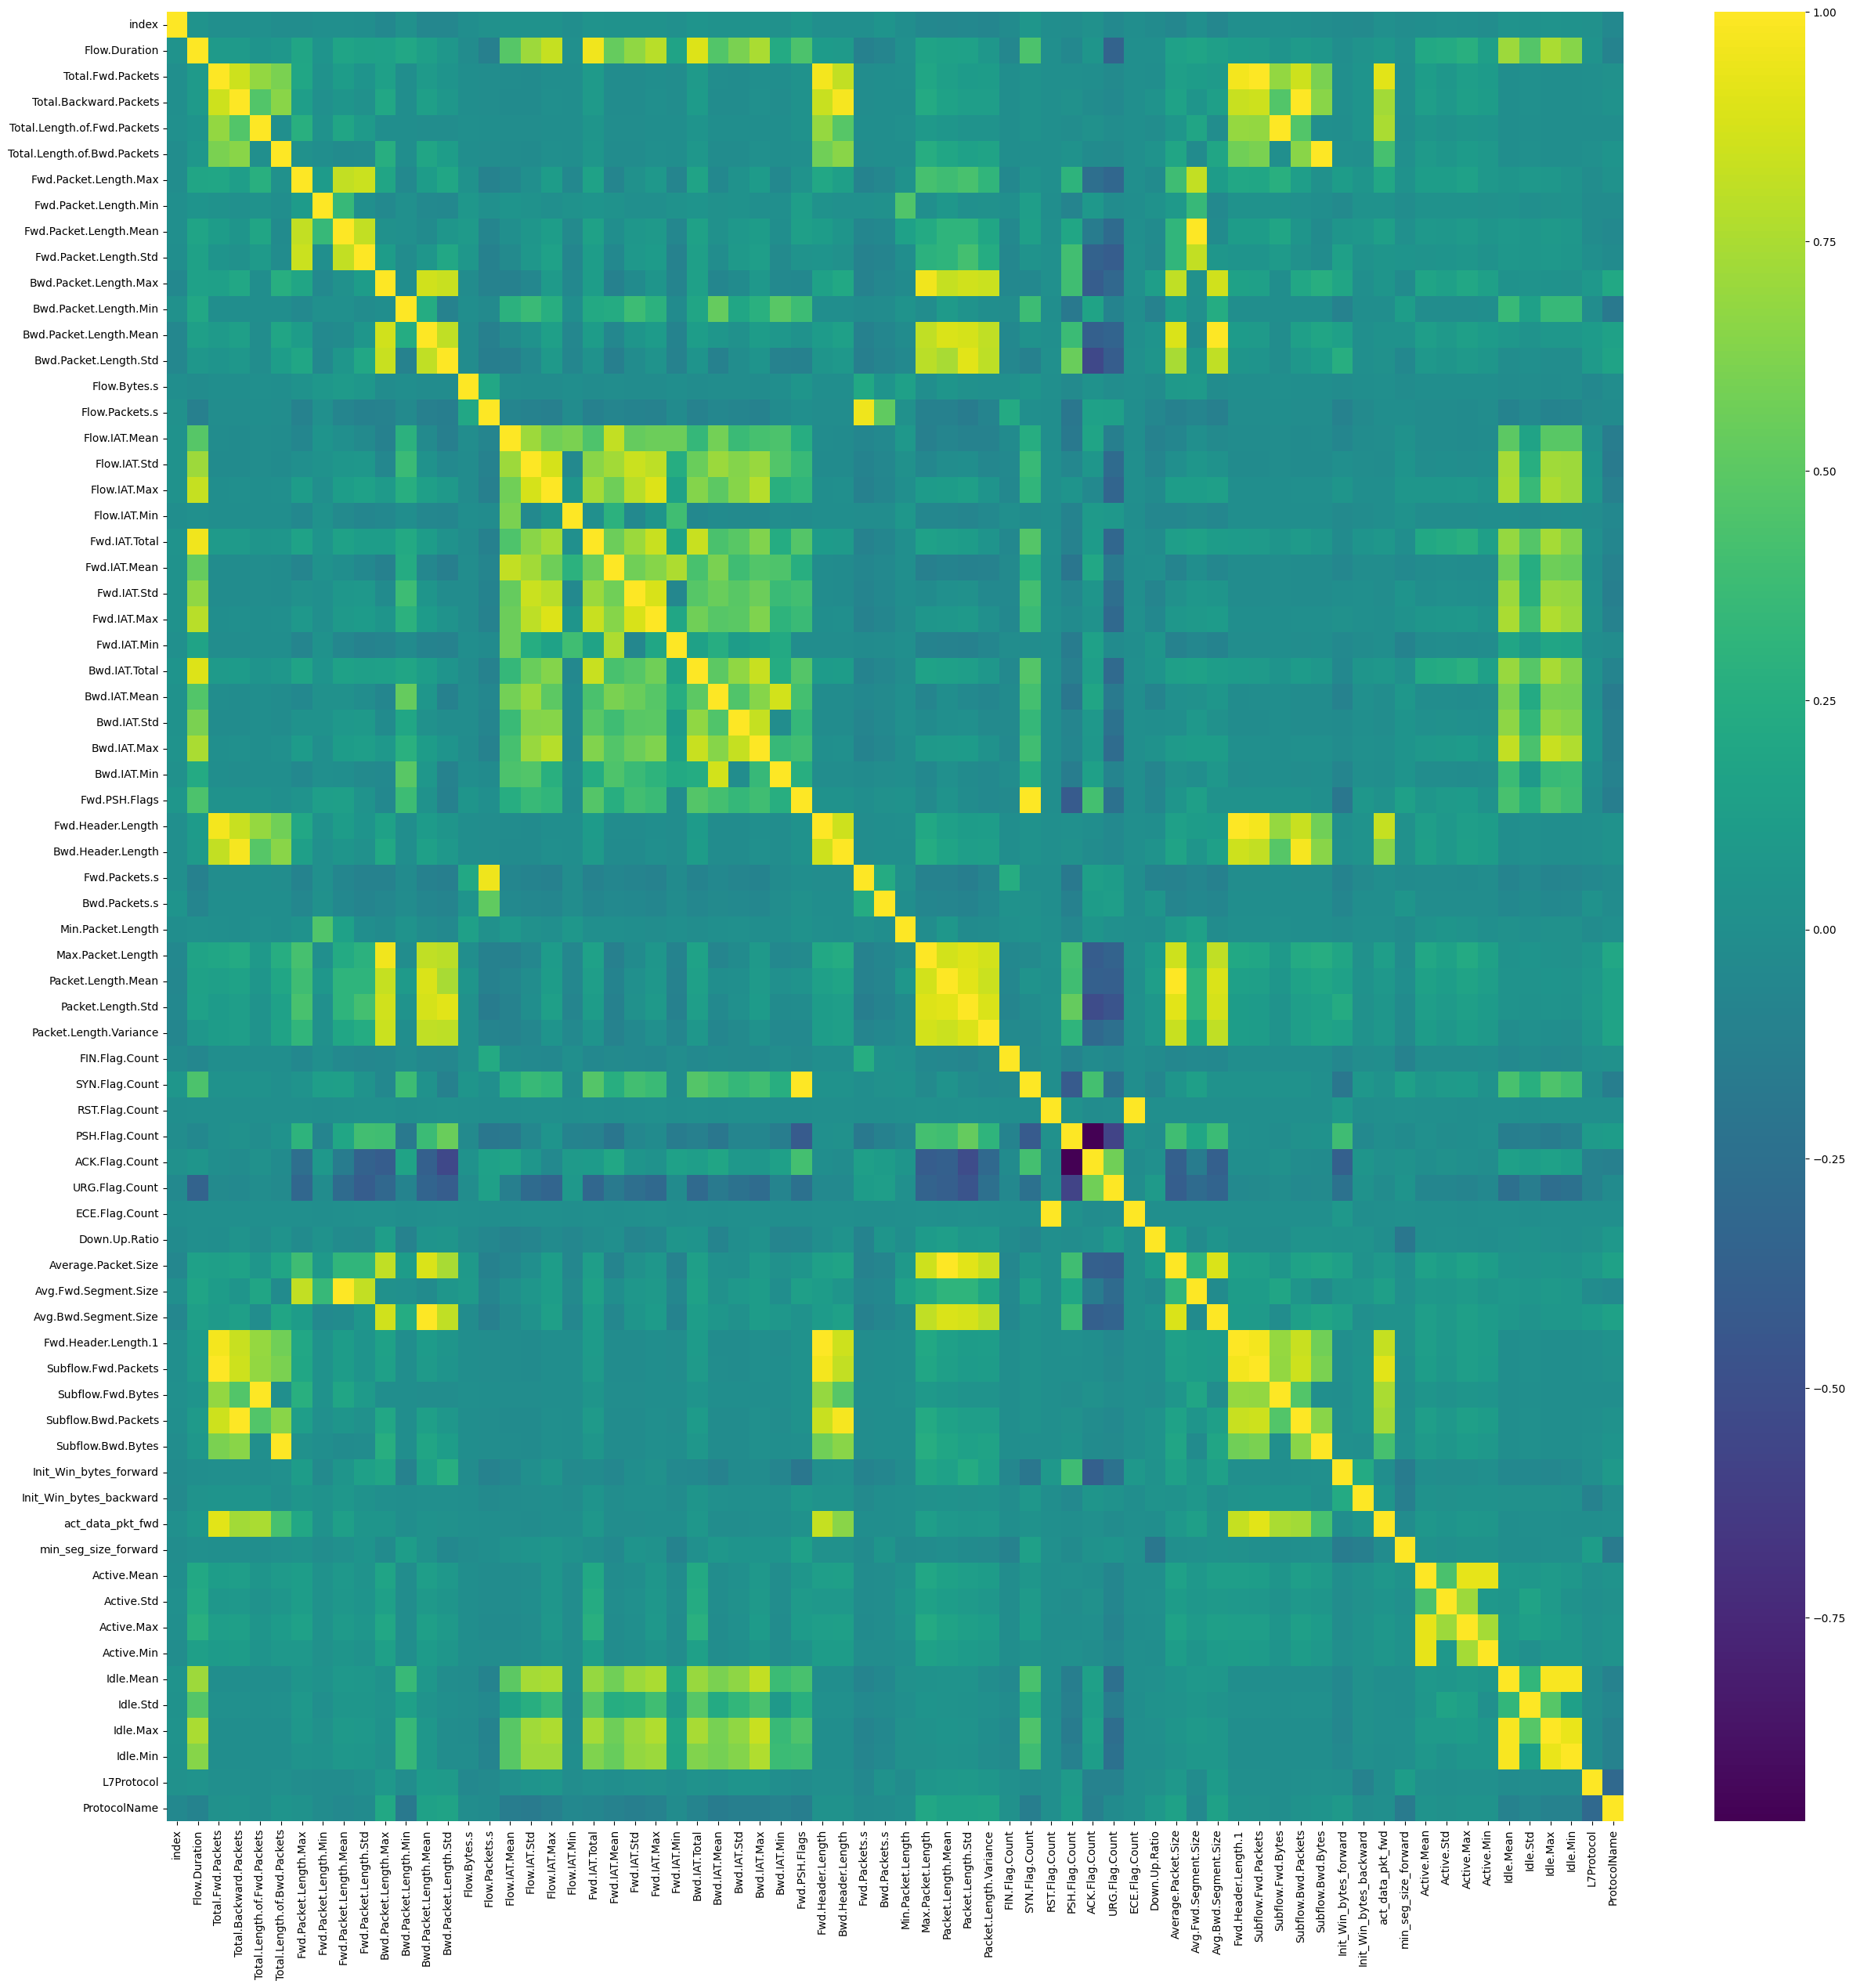

In [ ]:
# plotting the heatmap
import seaborn as sns
plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, cmap='viridis')
plt.plot()
# Save the plot as an image file (PNG in this example)
plt.savefig('correlation_heatmap.png', bbox_inches='tight')

In [ ]:
# choosing the best 1-50 features from same correlated values
sorted_corr_matrix_protocolName = correlation_matrix['ProtocolName'].abs().sort_values(ascending=False)

# Get the top 50 correlated features
final_features= sorted_corr_matrix_protocolName[1:51]  # Exclude the 'ProtocolName' itself

print("Top 50 features with the highest absolute correlation with ProtocolName: \n")
print(final_features.index.tolist())

pos_value_columns = final_features

Top 50 features with the highest absolute correlation with ProtocolName: 

['L7Protocol', 'Bwd.Packet.Length.Max', 'Max.Packet.Length', 'Bwd.Packet.Length.Std', 'Bwd.Packet.Length.Min', 'Packet.Length.Variance', 'Packet.Length.Mean', 'Packet.Length.Std', 'min_seg_size_forward', 'Avg.Bwd.Segment.Size', 'Bwd.Packet.Length.Mean', 'Flow.IAT.Std', 'Average.Packet.Size', 'Bwd.IAT.Mean', 'Flow.IAT.Mean', 'SYN.Flag.Count', 'Fwd.PSH.Flags', 'Fwd.IAT.Std', 'Bwd.IAT.Max', 'Bwd.IAT.Std', 'Flow.IAT.Max', 'ACK.Flag.Count', 'PSH.Flag.Count', 'Fwd.IAT.Mean', 'Idle.Max', 'Bwd.IAT.Min', 'Idle.Mean', 'Idle.Min', 'Fwd.IAT.Max', 'Flow.Duration', 'Init_Win_bytes_forward', 'Bwd.IAT.Total', 'Down.Up.Ratio', 'Fwd.IAT.Total', 'Idle.Std', 'index', 'Total.Length.of.Bwd.Packets', 'Subflow.Bwd.Bytes', 'Flow.IAT.Min', 'Avg.Fwd.Segment.Size', 'Fwd.Packet.Length.Mean', 'Active.Mean', 'Active.Max', 'Active.Min', 'Bwd.Header.Length', 'Total.Backward.Packets', 'Subflow.Bwd.Packets', 'URG.Flag.Count', 'Fwd.Packet.Length.M

In [ ]:
# Choose the top 29 features with the highest absolute correlation with ProtocolName
top_29_features = sorted_corr_matrix_protocolName.index[1:30]

# Create a DataFrame with these selected features and a copy of the 'ProtocolName' column
data_for_prediction_featureSelection = data[top_29_features].copy()
data_for_prediction_featureSelection['ProtocolName'] = data['ProtocolName']

# Split the data for feature selection via correlation matrix
feature_train, feature_test, target_train, target_test = train_test_split(data_for_prediction_featureSelection.drop('ProtocolName', axis=1), data_for_prediction_featureSelection['ProtocolName'], test_size=0.2)

# Standardize the features
sc = StandardScaler()
feature_train = sc.fit_transform(feature_train)
feature_test = sc.transform(feature_test)

In [ ]:
feature_train.shape, feature_test.shape

((136000, 49), (34000, 49))

In [ ]:
data_featured2 = data[top_49_features].copy()
data_featured2['ProtocolName'] = data['ProtocolName']

In [ ]:
data_featured2.to_csv('data_featured2.csv', index=False)

In [ ]:
data_featured2.head()

,L7Protocol,Bwd.Packet.Length.Max,Max.Packet.Length,Bwd.Packet.Length.Std,Bwd.Packet.Length.Min,Packet.Length.Variance,Packet.Length.Mean,Packet.Length.Std,min_seg_size_forward,Avg.Bwd.Segment.Size,...,Fwd.Packet.Length.Mean,Active.Mean,Active.Max,Active.Min,Bwd.Header.Length,Total.Backward.Packets,Subflow.Bwd.Packets,URG.Flag.Count,Fwd.Packet.Length.Max,ProtocolName
0,121,701,701,0.000000,701,84397.952381,310.428571,290.513257,32,701.000000,...,128.500000,5639.0,5639.0,5639.0,64,2,2,0,257,2
1,70,864,864,220.184620,0,33186.391626,78.965517,182.171325,20,82.466667,...,81.000000,0.0,0.0,0.0,312,15,15,0,517,15
2,120,0,0,0.000000,0,0.000000,0.000000,0.000000,32,0.000000,...,0.000000,0.0,0.0,0.0,0,0,0,0,0,13
3,121,503,11584,9.037760,0,484339.711005,545.674081,695.945193,32,0.162559,...,1105.415704,0.0,0.0,0.0,494688,15459,15459,0,11584,2
4,120,592,714,156.453079,0,37034.079772,97.185185,192.442406,20,64.785714,...,143.083333,0.0,0.0,0.0,292,14,14,0,714,13
